# 1. Initial Setup


## 1.1 Basic Python Libraries


In [1030]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt

%matplotlib inline

## 1.2 Handle Warnings and formatting


In [1032]:
# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

## 1.3 Import Scikit Learn Library


In [1034]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1.4 Import StatsModel Library


In [1036]:
import statsmodels.api as sm
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Data Sourcing & Inspection



## 2.1 Import Dataset

In [1038]:
bike_df = pd.read_csv("bike.csv")

## 2.2 Data Inspection

In [1040]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [1042]:
bike_df.shape

(730, 16)

### Observations:

In [300]:
# 1. Total number of rows : 730
# 2. Total number of columns : 16

In [1044]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations :

In [304]:
# 1. We have just one column with Object data type, however it contains Dates.
# 2. Majority of the columns have int data type, while a few are float
# 3. Some categorical fields have numerical data types (will analyse & convert them to categorical as needed)

In [1046]:
#check for numerical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [1050]:
#check for columns present in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## 2.3 Check for Nulls

In [786]:
null_count = bike_df.isnull().sum()
print(null_count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Observations :

In [312]:
# We have no null values present in any column of the dataset

## 2.4 Check for Duplicates


In [1052]:
dup_df = bike_df.copy()
dup_df.drop_duplicates(inplace= True)
dup_df.shape

(730, 16)

In [1054]:
bike_df.shape

(730, 16)

### Observations:

In [318]:
# No change in shape signifies we don't have any duplicate value present in our dataset

## 2.5 Data Cleaning

### 2.5.1 Convert Categorical Features:

In [1056]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations:

In [322]:
# Columns : season, yr, month, holiday, weekday and weathersit despite being categorical in nature have int64 as datatype.
# We can instead map some of these columns with the given details from data dictionary (Dataset Characteristics)

In [1058]:
bike_df.season.describe()

count   730.00
mean      2.50
std       1.11
min       1.00
25%       2.00
50%       3.00
75%       3.00
max       4.00
Name: season, dtype: float64

### Observations:

In [83]:
# The season column in your bike rental dataset seems to be a categorical variable with four unique values,  
# 1: spring, 2: summer, 3: fall, 4: winter
# representing different seasons (such as Spring, Summer, Fall, Winter).
# Mean: 2.50, which is between 2.00 (Spring) and 3.00 (Summer), indicating that the data may be fairly evenly distributed between the seasons.
# Standard Deviation: 1.11, which is relatively low compared to the range of values, suggesting that the seasons are fairly distributed.

In [1060]:
bike_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)

In [ ]:
# Similarly mapping weekdays to the respective values
# 0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday

In [1062]:
bike_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)

In [89]:
# Mapping weathersit with the respective values (from data dictionary)

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [1064]:
bike_df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [1066]:
# since fourth category isn't present in our dataset, we don't need to map it
bike_df['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

In [1068]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist/Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist/Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear/Partly cloudy,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear/Partly cloudy,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,9.31,11.46,43.70,12.52,82,1518,1600


### 2.5.2 Remove unwanted columns

In [103]:
# Some of the columns are redundant and an be remove without impacting our analysis :

# instant : Just shows up the index value for each record
# casual & registered : Our target variamble cnt already shows up the sum of casual and registered and hence we can drop these two
# date : Clearly, month and year are separately displayed in other columns (month and yr) We can hence manage without this column


In [1070]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1072]:
# creating a new data set without columns : instant, dteday casual and registered

new_bike = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [810]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### 2.5.3 Fix datatype

In [1074]:
# Setting up the right datatype for all numerical columns using pd.to_numeric()

new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].apply(pd.to_numeric)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [1076]:
# It's visible that even some of the categorical variables have float64/int64 datatype.
# We can convert these to object type

new_bike['mnth'] = new_bike['mnth'].astype('object')
new_bike['weekday'] = new_bike['weekday'].astype('object')
new_bike['season'] = new_bike['season'].astype('object')
new_bike['weathersit'] = new_bike['weathersit'].astype('object')

In [816]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 3. EDA

### 3.1 Numerical variables analysis

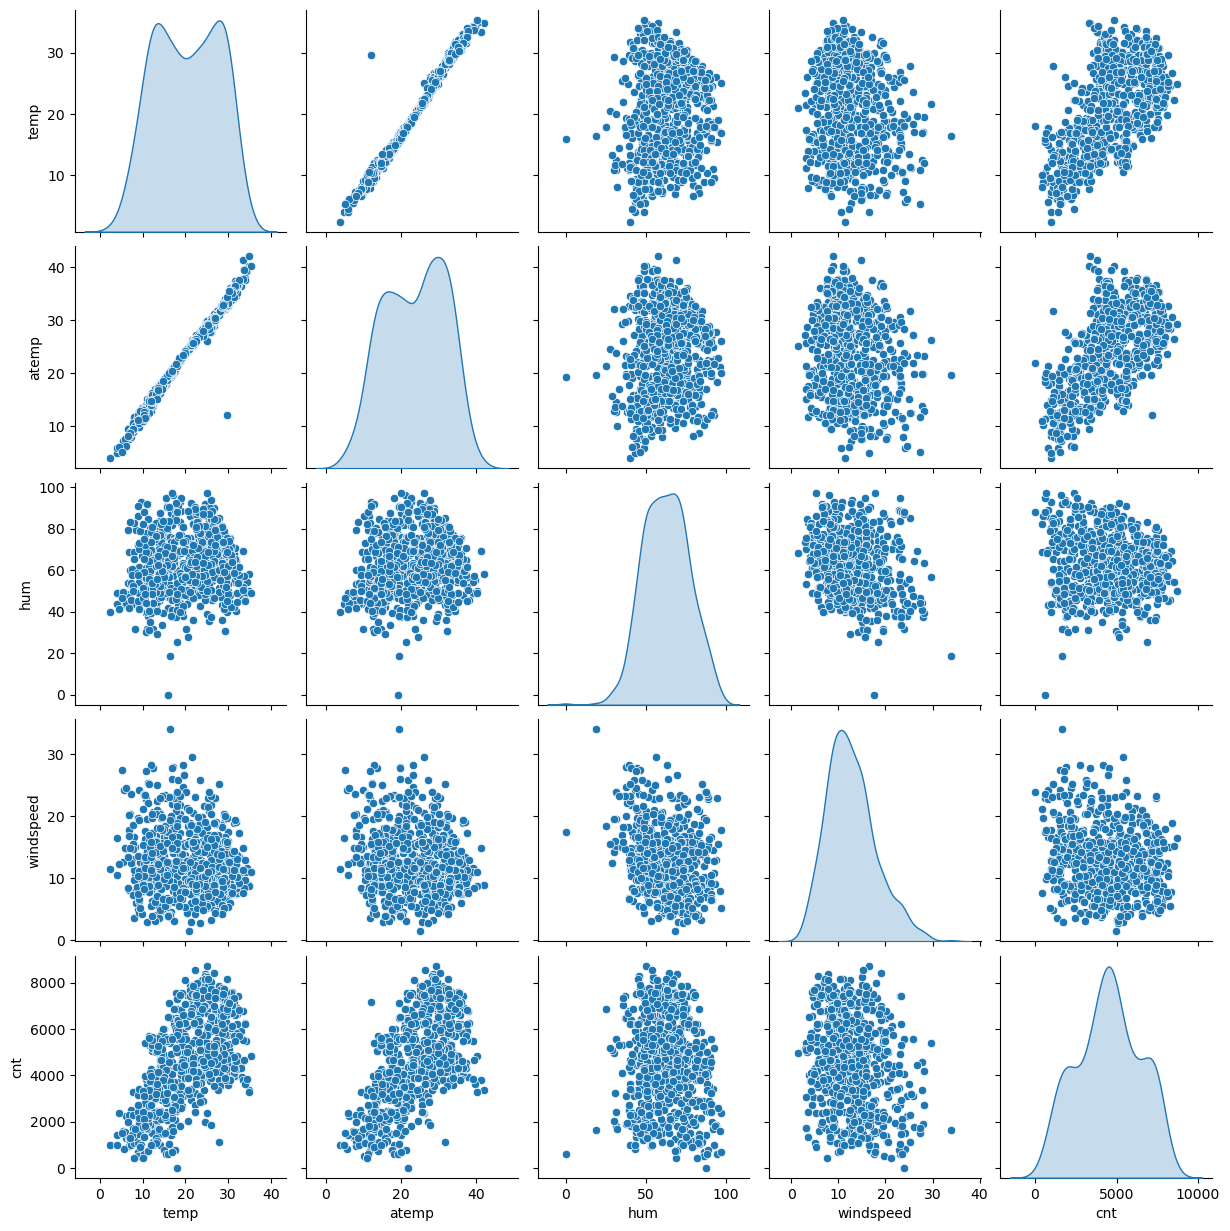

In [1078]:
num_vars = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

### Observations:

In [822]:
# It is evident that we have two similar fields and exists a linear relationship :
# temp : temperature in Celsius
# atemp: feeling temperature in Celsius
# We can hence drop one of these later while building our model.


### 3.2 Categorical variables analysis

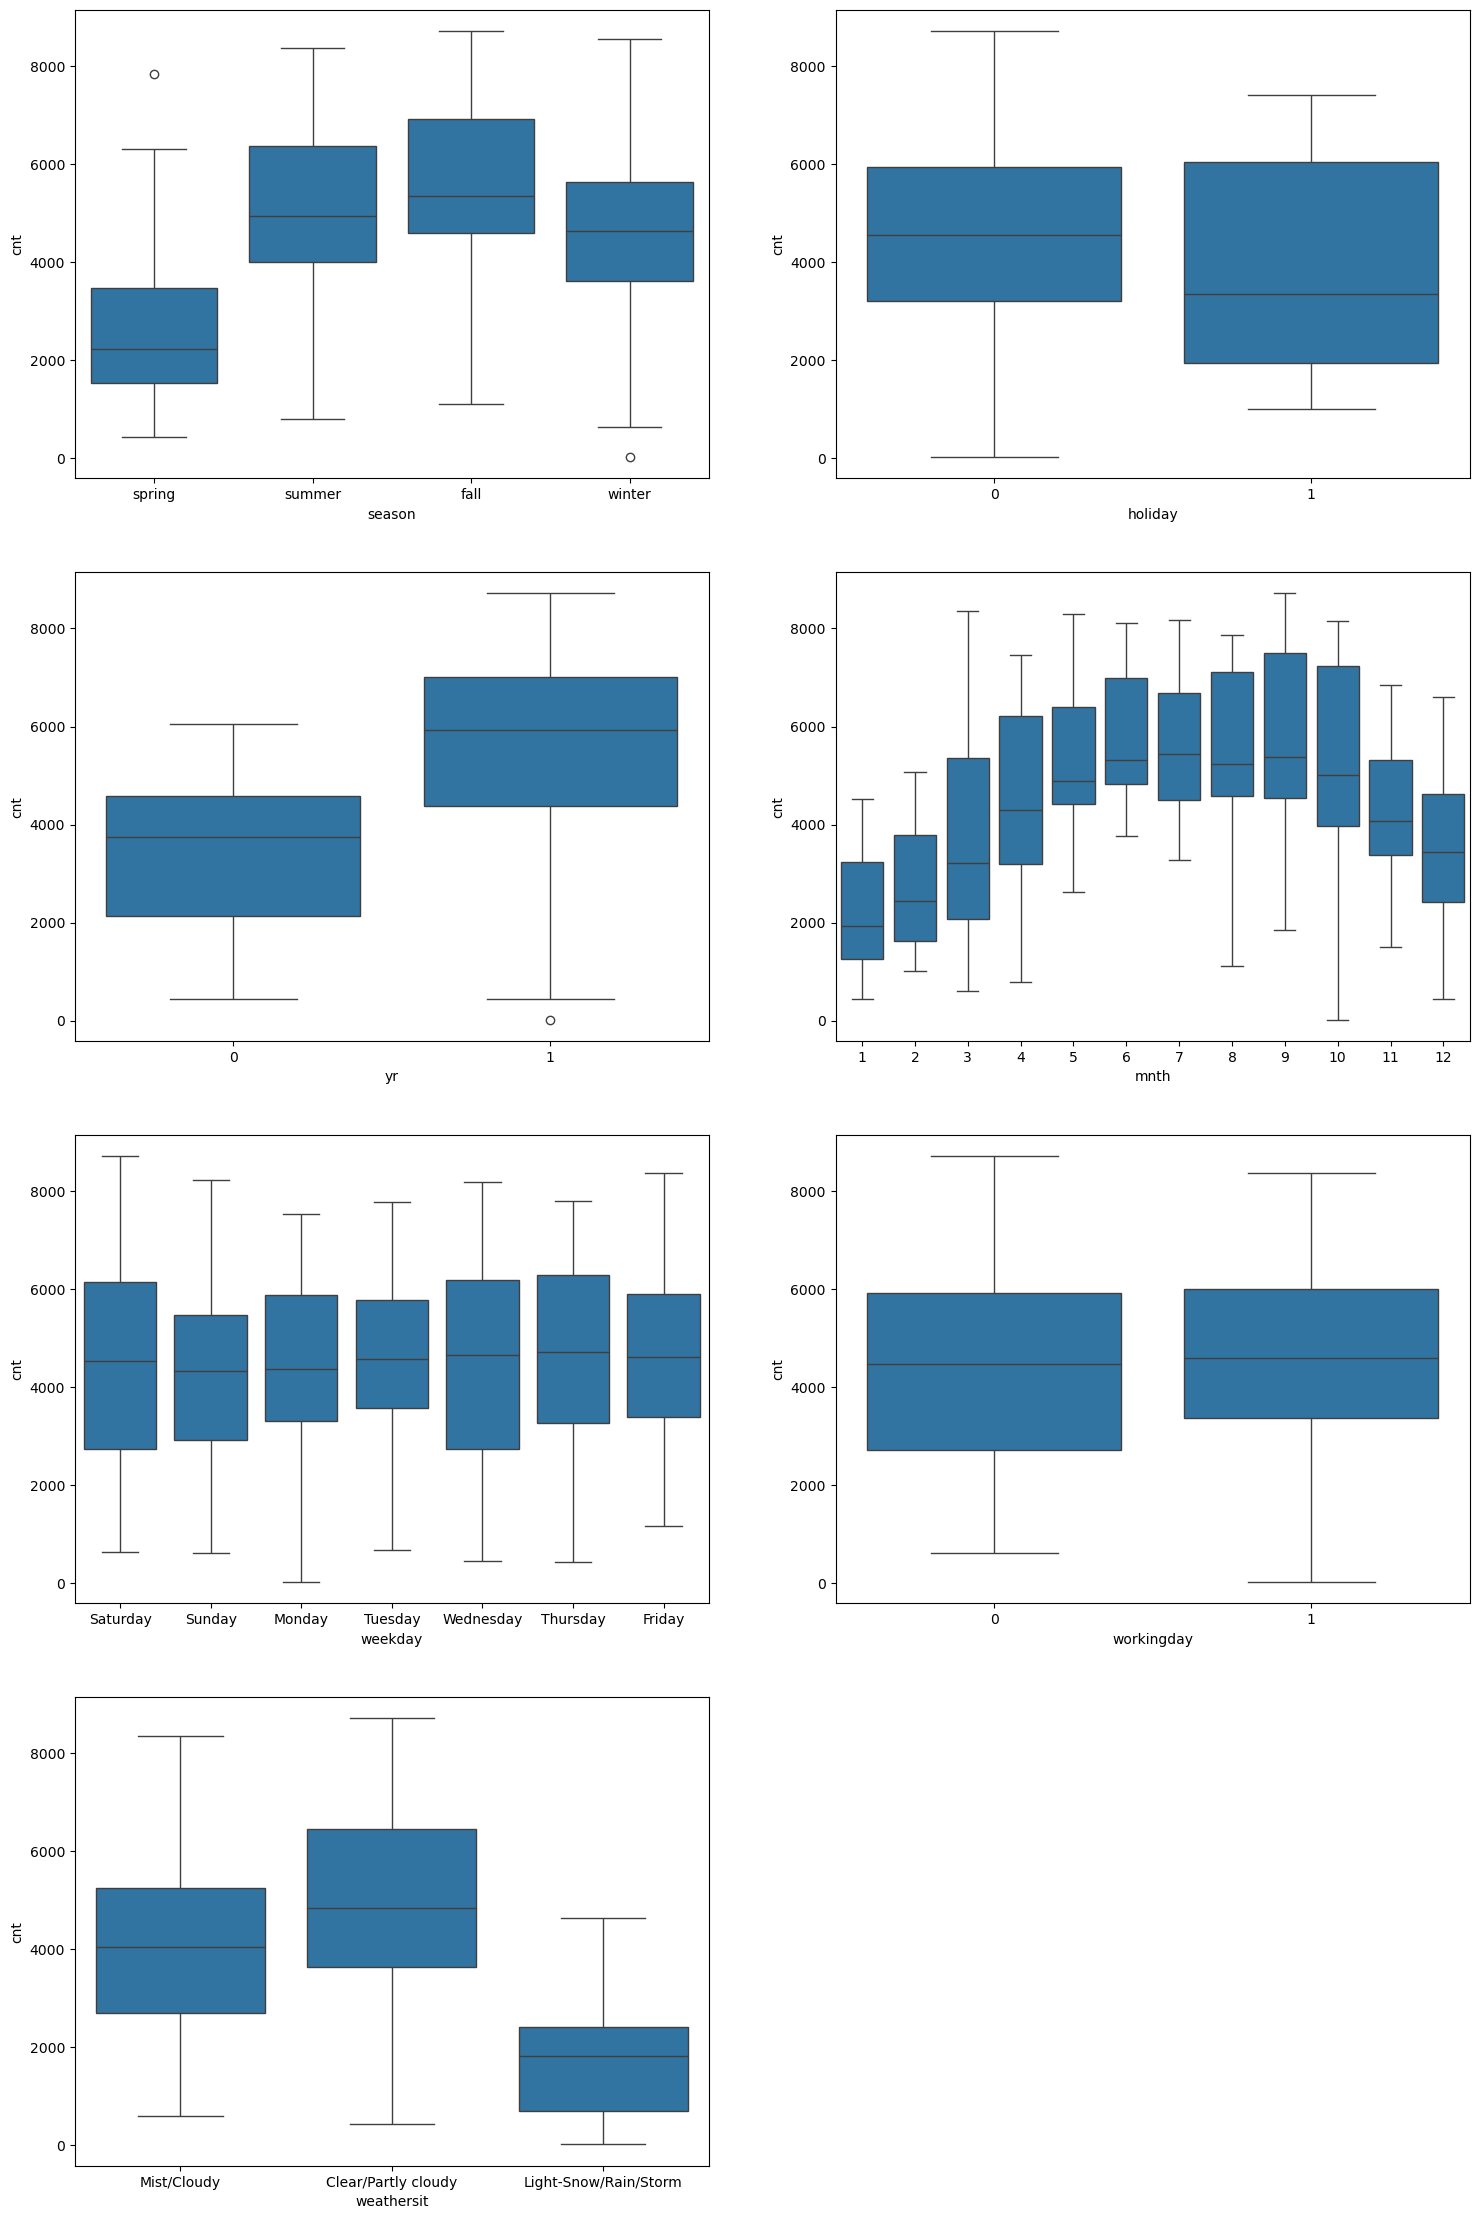

In [1080]:
## Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= new_bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= new_bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= new_bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= new_bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= new_bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= new_bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= new_bike)

plt.show()

### Observations

In [150]:
# season : One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, 
# followed by Summer and Winter. Clealry this can serve as a good predictor for our analysis.

# holiday : Majority(~ 97%) of the booking took place when it wasn't a holiday. 
# We have a very high bias here and thus it maynot be a good predctor variable.

# yr : During yr 1 , we have more number of bookings (almost twice) than yr 0. 
# Since our analysis will be based only on two years (2018 and 2019), they are important predictors.

# mnth : Distribution of months looks like a normally distributed, with months : 5-9 leading in number of bookings and 
# crossing the median over around 4500-5000. This indeed can serve as a good predictor.

# weekday : No clear pattern observed here as all the days show a similar spread This maynot be able to serve as a good predictor

# workingday : There is no significant difference between the counts on working and non-working days in terms of their distribution 
# and central tendency and thus it maynot be a good predctor variable.

# weathersit : Majority of the bookings took place during a clear/partly cloudy weather with a median at around 
# 5000 followed by misty/cloudy weather, with median 4000. This can also serve as a good predictor.

# Good Indicators : season, yr, mnth, weathersit

### 3.3 Distribution of variables across rental cnt

In [1082]:
# Generic function to plot graphs

def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

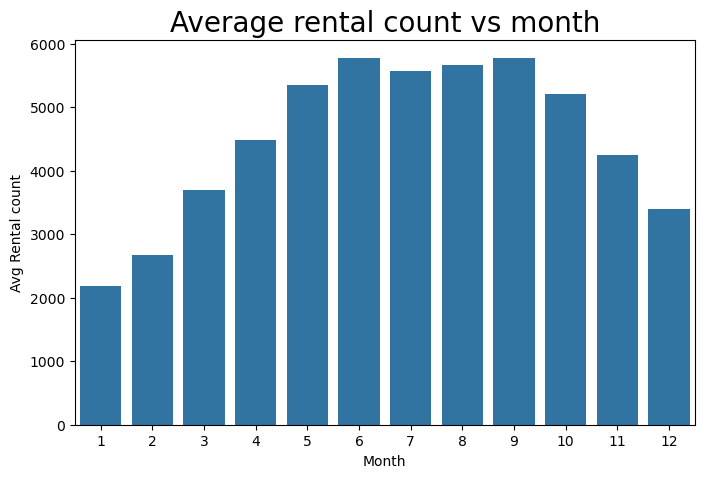

In [1084]:
#month vs rental count
dist1 = bike_df.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

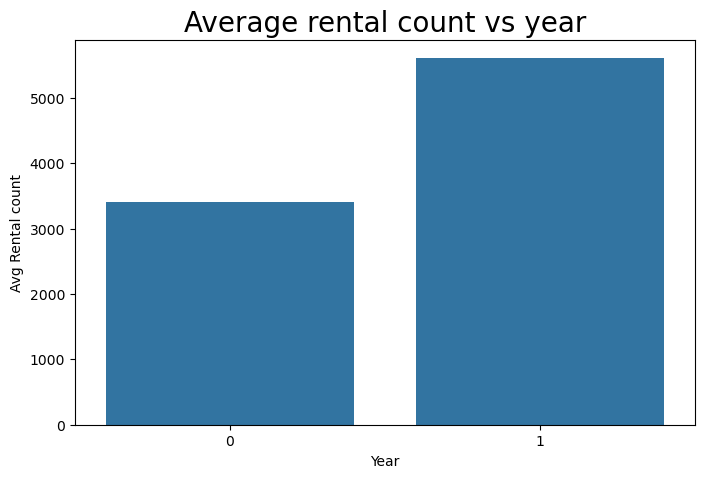

In [1086]:
#yr vs rental count
dist2 = bike_df.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year', x_label = 'Year', y_label='Avg Rental count')

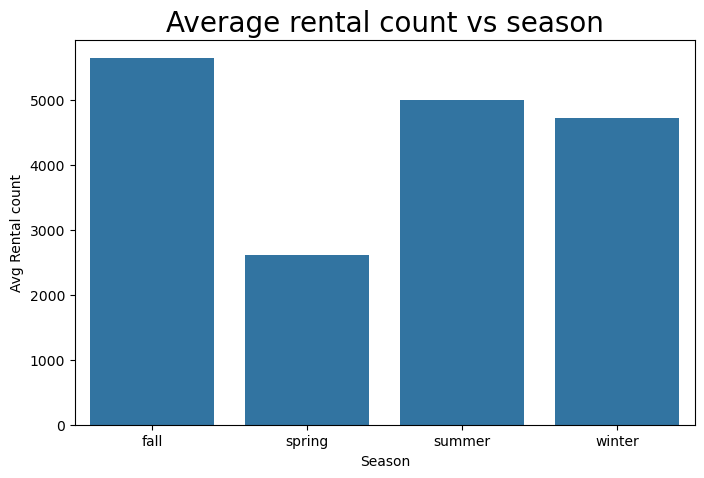

In [1088]:
# season vs rental count
dist1 = bike_df.groupby(by='season').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs season', x_label = 'Season', y_label='Avg Rental count')

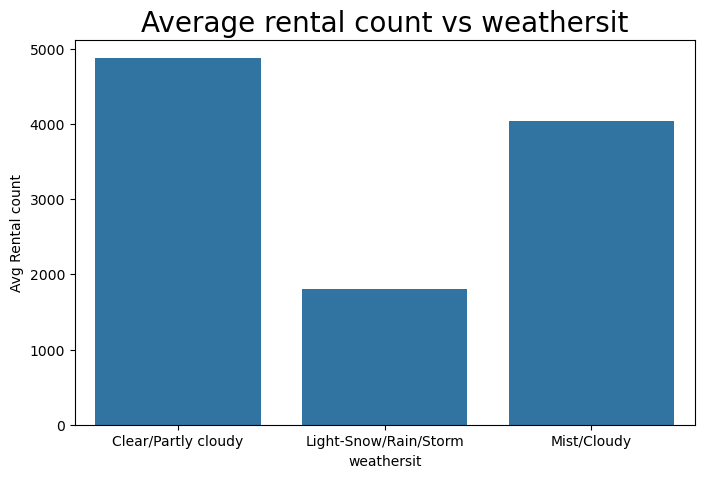

In [1090]:
# weathersit vs rental count
dist2 = bike_df.groupby(by='weathersit').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs weathersit', x_label = 'weathersit', y_label='Avg Rental count')

### Observations:

In [ ]:

# Plot 1 : Highest rental counts during July-Sept (fall season) and lowest during Dec-Feb (extreme weather)

# Plot 2 : Rental counts are almost twice for year 1 as compared to year 0

# Plot 3 : Highest rental counts during fall season and lowest during sprimg season

# Plot 4 : Highest rental counts during weather pattern clear/partly cloudy and lowest during light snow/rain/storm

## 4. Dummy Variable Creation

In [ ]:

# Drop original categorical variables once dummies have been created
# Drop the first value for each of the dummy variables

In [1092]:
# Creating dummy variables for four major categorical variables : mnth, weathersit, season, weekday

new_bike = pd.get_dummies(new_bike, drop_first=True, dtype='uint8')
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   hum                               730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   cnt                               730 non-null    int64  
 8   season_spring                     730 non-null    uint8  
 9   season_summer                     730 non-null    uint8  
 10  season_winter                     730 non-null    uint8  
 11  mnth_2                            730 non-null    uint8  
 12  mnth_3  

In [1094]:
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,14.11,18.18,80.58,10.75,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.90,17.69,69.61,16.65,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1096]:
new_bike.shape

(730, 30)

## 5. Split Data : Train and Test

In [183]:
# Splitting the entire data set in the two parts using train_test_split method from SKLEARN library in the ratio of 80:20 :

# TRAIN : 80%

# TEST : 20%

In [1098]:
## In order to ensure both train and test parts have the same number of rows, we need to specify random_state
## using random.seed() from numpy to implement this.

np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.8, test_size = 0.2, random_state = 111)

In [1100]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 520 to 724
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                584 non-null    int64  
 1   holiday                           584 non-null    int64  
 2   workingday                        584 non-null    int64  
 3   temp                              584 non-null    float64
 4   atemp                             584 non-null    float64
 5   hum                               584 non-null    float64
 6   windspeed                         584 non-null    float64
 7   cnt                               584 non-null    int64  
 8   season_spring                     584 non-null    uint8  
 9   season_summer                     584 non-null    uint8  
 10  season_winter                     584 non-null    uint8  
 11  mnth_2                            584 non-null    uint8  
 12  mnth_3     

In [1102]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 358 to 472
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   cnt                               146 non-null    int64  
 8   season_spring                     146 non-null    uint8  
 9   season_summer                     146 non-null    uint8  
 10  season_winter                     146 non-null    uint8  
 11  mnth_2                            146 non-null    uint8  
 12  mnth_3     

### 5.1 Inspect dataset post split

In [1104]:
bike_train.shape

(584, 30)

In [1106]:
bike_test.shape

(146, 30)

### Observations:

In [ ]:
# As 80% of 730 = 584
# As 20 % of 730 = 146

### 5.2 Check the correlation among all variables (after adding dummies)

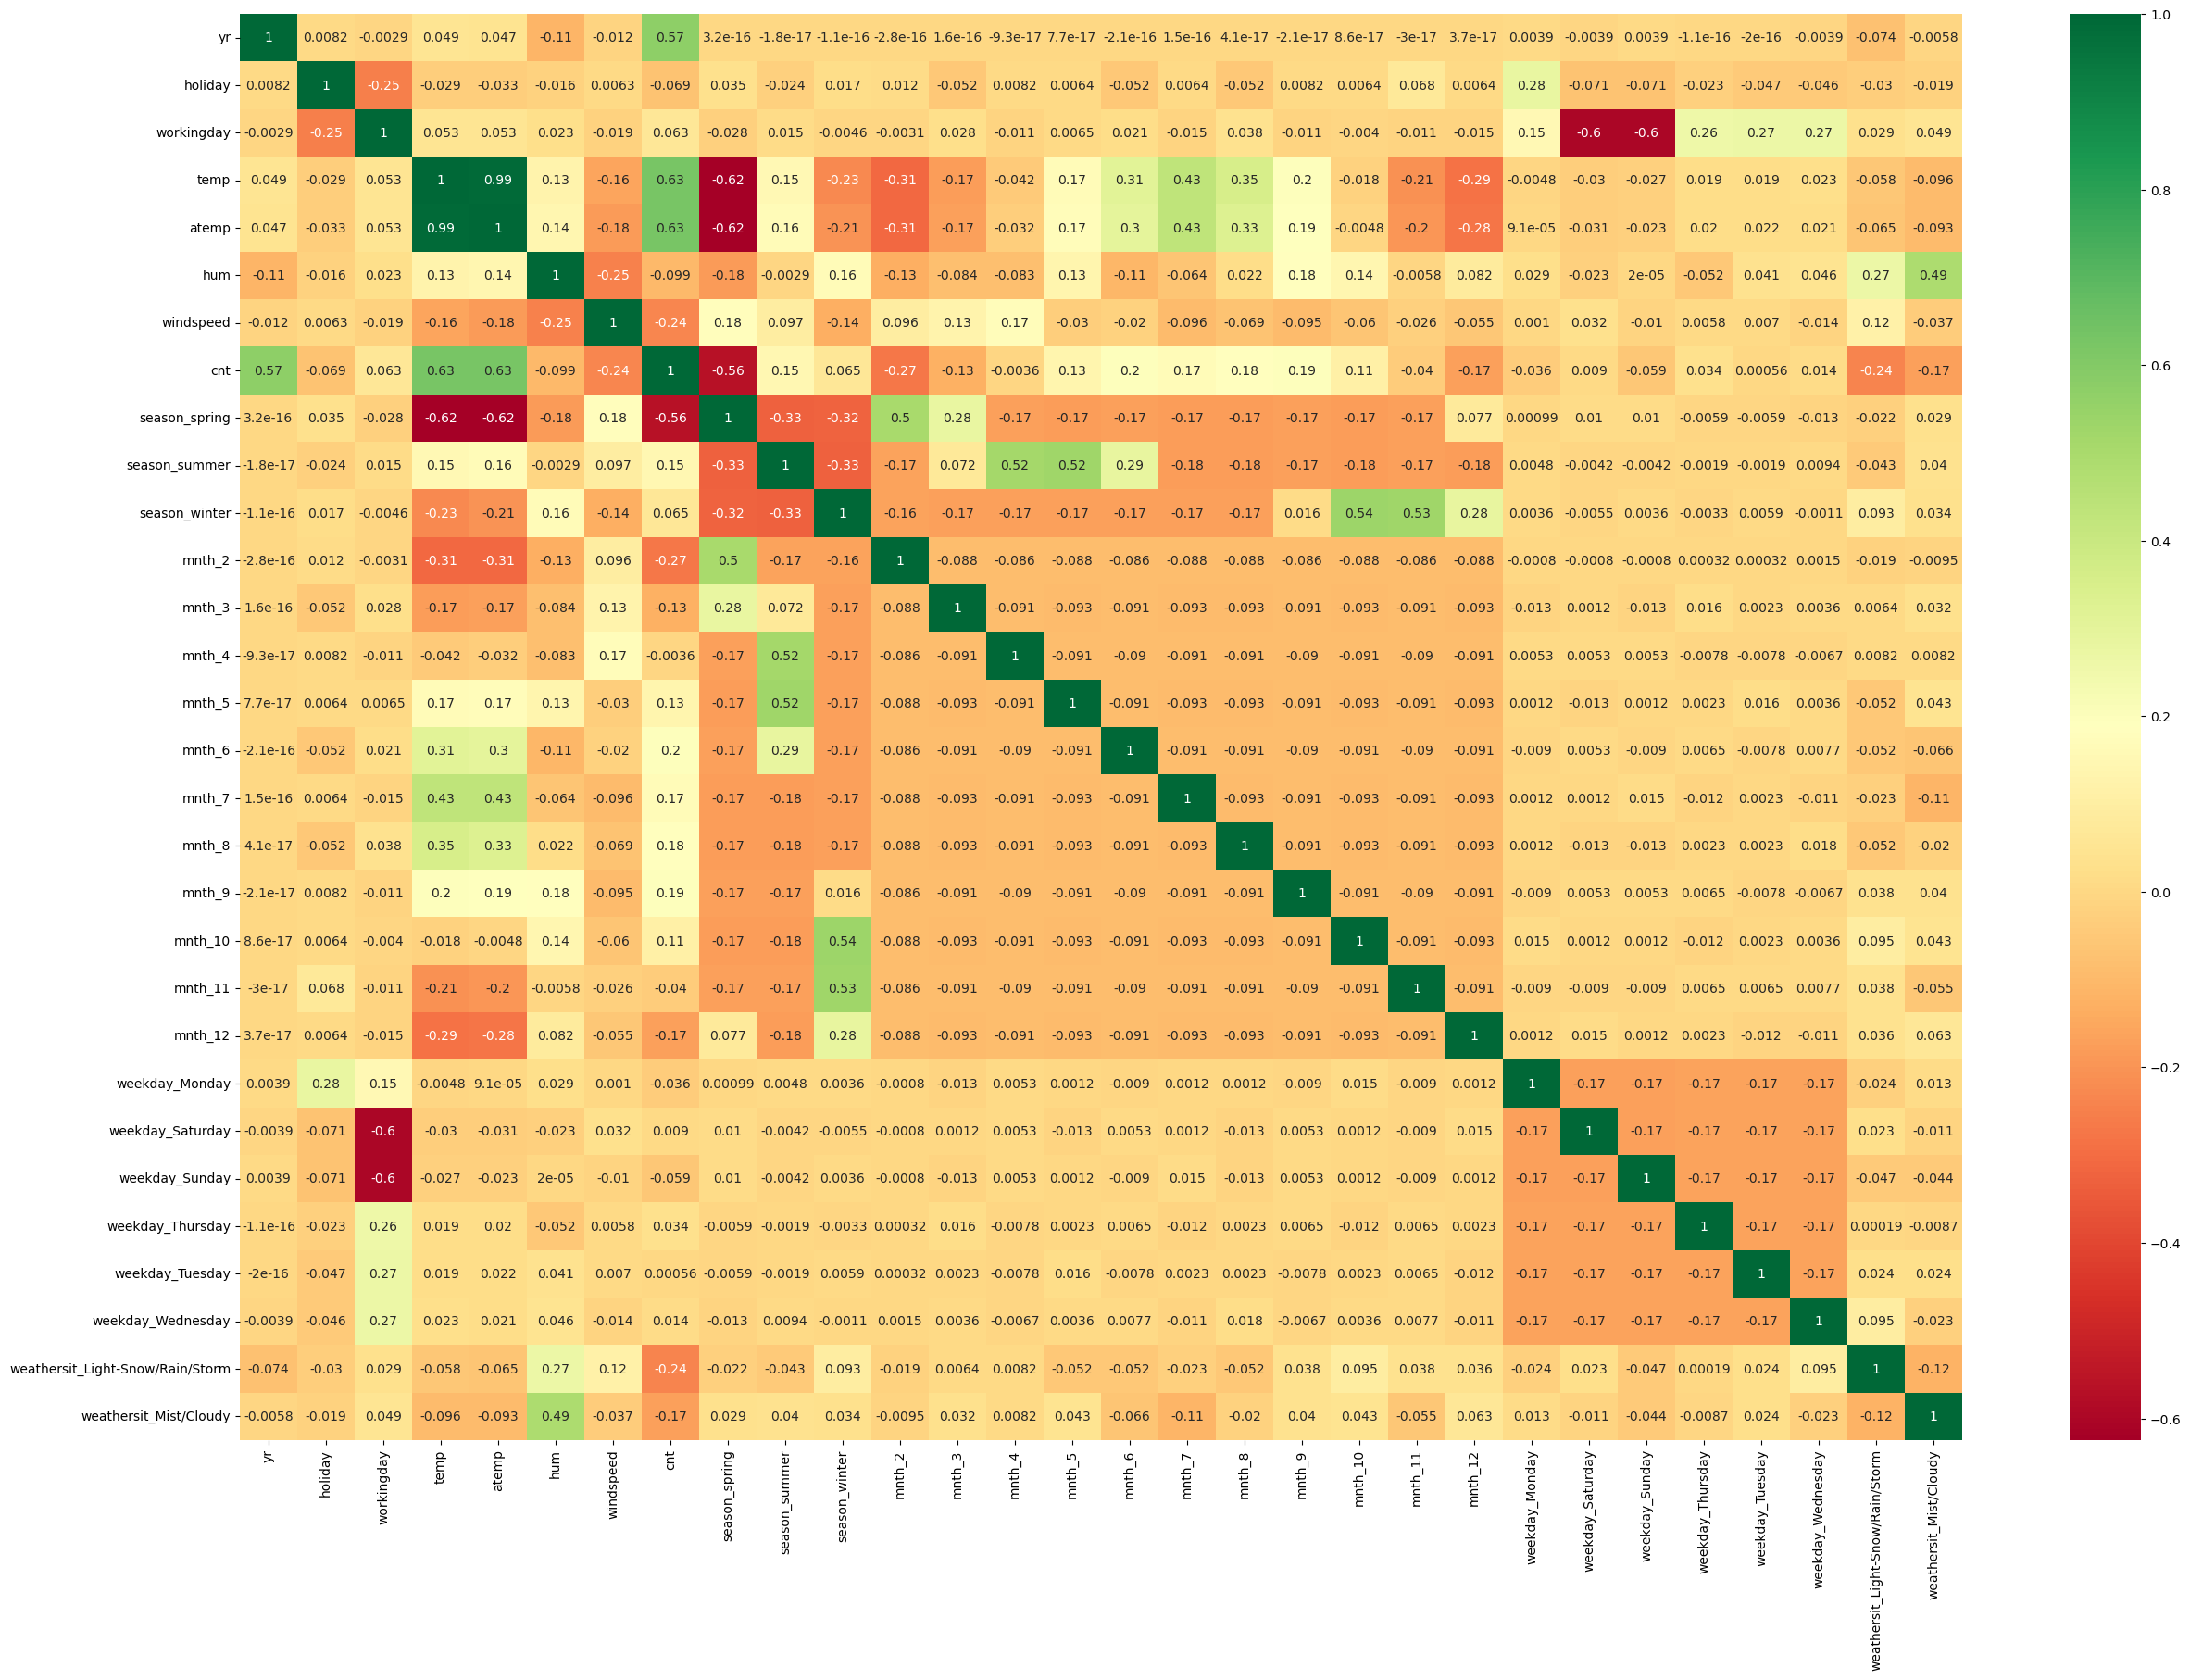

In [1108]:
plt.figure(figsize = (30,20))
sns.heatmap(new_bike.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Observations:

In [215]:
# Variables having a high collinearity with target variable 'cnt' :
# atemp (0.63)
# yr (0.57)
# season spring (-0.56)

# Variables having a high to moderate collinearity with each other :
# temp and atemp (0.99)
# hum and weathersit_Mist/Cloudy (0.49)
# season_winter and mnth_10 (0.54), mnth_11 (0.53)
# season_summer and mnth_4 (0.54), mnth_5 (0.54)
# atemp and mnth_7 (0.43)
# mnth_2 and season_spring (0.5)

In [217]:
# Steps to Address Multicollinearity

# A. Remove or Combine Highly Correlated Features
# Drop one of temp or atemp (since they are almost perfectly correlated).
# Drop season_spring if you're using month-based features like mnth_2 and mnth_3, which already capture some seasonal effects.
# Combine highly correlated months and seasons (e.g., merge season_summer with mnth_4 and mnth_5).

# B. Consider Feature Engineering
# Seasonal Grouping: Group months into broader categories like "Winter Months" (December–February), "Spring Months" (March–May), and so on.
# Interaction Features: If temp and atemp both seem important, you can create interaction features like temp * atemp to combine their 
# effects into a single feature, reducing collinearity.

# C. Check Model Performance After Changes
# After making these adjustments, rerun your model to see if there's an improvement in performance and check if multicollinearity has decreased.

## 6. Feature Scaling

In [1110]:
scale =  MinMaxScaler()

In [856]:
# Convert boolean columns to integers (1 for True, 0 for False)
# boolean_columns = bike_train.select_dtypes(include=['bool']).columns
# bike_train[boolean_columns] = bike_train[boolean_columns].astype(int)

In [1112]:
# before rescaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,22.17,26.29,61.33,14.04,7001,0,1,...,0,0,0,0,0,0,1,0,0,1
89,0,0,1,11.00,12.88,91.83,14.58,1685,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,17.56,21.40,85.83,14.83,2660,1,0,...,0,1,0,0,0,0,0,1,0,1
121,0,0,1,22.52,26.64,73.00,12.29,4401,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,15.61,18.78,62.33,15.75,5499,0,0,...,1,0,1,0,0,0,0,0,0,1


In [1114]:
# Apply scaler on the numerical variables of train dataset

bike_num = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[bike_num] = scale.fit_transform(bike_train[bike_num])

In [1116]:
#post rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,...,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00
mean,0.49,0.03,0.69,0.55,0.52,0.52,0.42,0.50,0.24,0.25,...,0.09,0.08,0.15,0.15,0.13,0.15,0.15,0.13,0.02,0.33
std,0.50,0.16,0.46,0.23,0.21,0.19,0.19,0.23,0.43,0.43,...,0.28,0.27,0.36,0.36,0.34,0.36,0.35,0.34,0.15,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,0.34,0.37,0.28,0.34,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,0.54,0.53,0.39,0.51,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.75,0.70,0.66,0.53,0.67,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [1118]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,0.60,0.59,0.50,0.47,0.81,0,1,...,0,0,0,0,0,0,1,0,0,1
89,0,0,1,0.26,0.23,0.92,0.49,0.15,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,0.46,0.46,0.84,0.50,0.27,1,0,...,0,1,0,0,0,0,0,1,0,1
121,0,0,1,0.61,0.60,0.66,0.40,0.49,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,0.40,0.39,0.51,0.53,0.62,0,0,...,1,0,1,0,0,0,0,0,0,1


## 6. Build Linear Model

### 6.1 Feature selection using RFE

In [1124]:
# creating y variable to hold our taget variable : cnt
y = bike_train.pop('cnt')

KeyError: 'cnt'

In [1126]:
x = bike_train

In [1128]:
lr = LinearRegression()

In [1130]:
# using Linearregression().fit() in order to get the right fitting model

lr.fit(x, y)

LinearRegression()

In [1132]:
# We have around 28 columns (variables), excluding the target variable. Since it isn't easy to analyse all these predictors, will consider 15 variables to start with.
# RFE method shall be used here to which we will provide the arbitrarily chosen 15 predictors (as 1, and others as 0).
# Apply RFE with 15 output variables

r = RFE(lr, n_features_to_select = 15)

In [1134]:
#using Linearregression().fit() in order to get the right fitting model
r = r.fit(x, y)

In [1136]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

r_bike = pd.DataFrame ({'Predictors' : x.columns, 'Status' : r.support_, 'Rank' : r.ranking_})

In [1138]:
r_bike.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,yr,True,1
23,weekday_Sunday,True,1
22,weekday_Saturday,True,1
18,mnth_10,True,1
17,mnth_9,True,1
27,weathersit_Light-Snow/Rain/Storm,True,1
13,mnth_5,True,1
28,weathersit_Mist/Cloudy,True,1
3,temp,True,1
1,holiday,True,1


In [1140]:
# Now we have our 15 chosen predictors evaluated by RFE. The ones ranked as 1 are the top predictors which will have a major impact on the outcome.
# However, it is not a good practice to fully rely on this and hence we must validate this further using different models
# and eliminate the features that aren't required or doesn't satify a given criteria.

## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.
def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors']  = df.columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

### 6.2 Model building using STATS MODEL

#### 6.2.1 MODEL-1

In [1142]:
## VIF 

get_vif(x)

,Predictors,VIF_Value
0,temp,204.28
1,atemp,187.35
2,workingday,69.37
3,weekday_Saturday,14.93
4,weekday_Sunday,13.25
5,season_spring,10.37
6,mnth_7,10.04
7,mnth_8,9.35
8,season_winter,8.46
9,season_summer,7.82


In [1144]:
#extracting all columns with "True" status, i.e RFE selected variables and storing them in new_col

new_col = x.columns[r.support_]
new_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_Saturday',
       'weekday_Sunday', 'weathersit_Light-Snow/Rain/Storm',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [1146]:
#checking out variables/columns rejected by RFE
x.columns[~r.support_]

Index(['season_summer', 'season_winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [1148]:
# creating a new dataframe x_rfe with RFE selected variables

x_rfe = x[new_col]

In [1150]:
# create Model-1

#adding constant
x_lr1 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m1 = sm.OLS(y, x_lr1).fit()

In [1152]:
# check the obtained parameters from first generated model

lr_m1.params

const                               0.25
yr                                  0.25
holiday                             0.02
workingday                          0.09
temp                               -0.21
atemp                               0.63
hum                                -0.15
windspeed                          -0.10
season_spring                      -0.16
mnth_5                              0.04
mnth_9                              0.11
mnth_10                             0.09
weekday_Saturday                    0.09
weekday_Sunday                      0.05
weathersit_Light-Snow/Rain/Storm   -0.20
weathersit_Mist/Cloudy             -0.05
dtype: float64

In [1154]:
## Get the summary of linear regression result for model 1

print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.90e-222
Time:                        22:31:56   Log-Likelihood:                 573.50
No. Observations:                 584   AIC:                            -1117.
Df Residuals:                     569   BIC:                            -1051.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We now proceed after removing holiday due giving a priority to p-val : 0.739

In [1156]:
new_col = new_col.drop(['temp'])
x_rfe = x[new_col]

In [1158]:
## VIF

get_vif(x_rfe)

,Predictors,VIF_Value
0,workingday,25.20
1,weekday_Saturday,6.15
2,weekday_Sunday,5.69
3,hum,2.07
4,holiday,2.02
5,atemp,1.82
6,season_spring,1.81
7,weathersit_Mist/Cloudy,1.64
8,weathersit_Light-Snow/Rain/Storm,1.38
9,windspeed,1.16


In [1160]:
# create Model-2

#adding constant
x_lr2 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m2 = sm.OLS(y, x_lr2).fit()

In [1164]:
# check the obtained parameters from second generated model

lr_m2.params

const                               0.25
yr                                  0.25
holiday                             0.02
workingday                          0.09
atemp                               0.40
hum                                -0.14
windspeed                          -0.11
season_spring                      -0.16
mnth_5                              0.04
mnth_9                              0.10
mnth_10                             0.09
weekday_Saturday                    0.09
weekday_Sunday                      0.05
weathersit_Light-Snow/Rain/Storm   -0.20
weathersit_Mist/Cloudy             -0.06
dtype: float64

In [1166]:
## Get the summary of linear regression result for model 2

print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.91e-223
Time:                        22:32:20   Log-Likelihood:                 573.02
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     570   BIC:                            -1057.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### new model

In [1168]:
new_col = new_col.drop(['holiday'])
x_rfe = x[new_col]

In [1170]:
## VIF 
get_vif(x_rfe)

,Predictors,VIF_Value
0,hum,14.13
1,workingday,13.06
2,atemp,10.76
3,windspeed,5.64
4,weekday_Saturday,3.57
5,weekday_Sunday,3.33
6,weathersit_Mist/Cloudy,2.39
7,season_spring,2.15
8,yr,1.97
9,weathersit_Light-Snow/Rain/Storm,1.37


In [1172]:
# create Model-3

#adding constant
x_lr3 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m3 = sm.OLS(y, x_lr3).fit()

In [1174]:
# check the obtained parameters from third generated model

lr_m3.params

const                               0.26
yr                                  0.25
workingday                          0.08
atemp                               0.40
hum                                -0.14
windspeed                          -0.11
season_spring                      -0.16
mnth_5                              0.04
mnth_9                              0.10
mnth_10                             0.09
weekday_Saturday                    0.07
weekday_Sunday                      0.04
weathersit_Light-Snow/Rain/Storm   -0.20
weathersit_Mist/Cloudy             -0.06
dtype: float64

In [1176]:
## Get the summary of linear regression result for model 2
print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.91e-223
Time:                        22:32:31   Log-Likelihood:                 573.02
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     570   BIC:                            -1057.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We now proceed after removing weekday_Sunday due giving a priority to p-val : 0.154 

In [1178]:
new_col = new_col.drop(['weekday_Sunday'])
x_rfe = x[new_col]

In [1180]:
## VIF 
get_vif(x_rfe)

,Predictors,VIF_Value
0,hum,11.86
1,atemp,9.38
2,windspeed,4.80
3,workingday,4.68
4,weathersit_Mist/Cloudy,2.34
5,season_spring,1.98
6,yr,1.94
7,weekday_Saturday,1.78
8,weathersit_Light-Snow/Rain/Storm,1.33
9,mnth_5,1.24


In [1182]:
# create Model-4

#adding constant
x_lr4 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m4 = sm.OLS(y, x_lr4).fit()

In [1184]:
# check the obtained parameters from third generated model

lr_m4.params

const                               0.29
yr                                  0.25
workingday                          0.05
atemp                               0.40
hum                                -0.14
windspeed                          -0.11
season_spring                      -0.16
mnth_5                              0.04
mnth_9                              0.10
mnth_10                             0.09
weekday_Saturday                    0.04
weathersit_Light-Snow/Rain/Storm   -0.20
weathersit_Mist/Cloudy             -0.06
dtype: float64

In [1186]:
## Get the summary of linear regression result for model 3
print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     264.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.82e-224
Time:                        22:32:44   Log-Likelihood:                 571.98
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     571   BIC:                            -1061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We now proceed after removing hum due VIF > 5 i.e. 11.86

In [1188]:
new_col = new_col.drop(['hum'])
x_rfe = x[new_col]

In [1190]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.79
1,windspeed,4.80
2,workingday,4.53
3,yr,1.94
4,season_spring,1.78
5,weekday_Saturday,1.75
6,weathersit_Mist/Cloudy,1.52
7,mnth_5,1.19
8,mnth_9,1.19
9,mnth_10,1.17


In [1192]:
# create Model-5

#adding constant
x_lr5 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m5 = sm.OLS(y, x_lr5).fit()

In [1194]:
# check the obtained parameters from fifth generated model

lr_m5.params

const                               0.22
yr                                  0.25
workingday                          0.05
atemp                               0.38
windspeed                          -0.07
season_spring                      -0.16
mnth_5                              0.03
mnth_9                              0.09
mnth_10                             0.08
weekday_Saturday                    0.05
weathersit_Light-Snow/Rain/Storm   -0.27
weathersit_Mist/Cloudy             -0.09
dtype: float64

In [1196]:
## Get the summary of linear regression result for model 5

print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     274.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.76e-220
Time:                        22:32:55   Log-Likelihood:                 559.63
No. Observations:                 584   AIC:                            -1095.
Df Residuals:                     572   BIC:                            -1043.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We now proceed after removing mnth_5 due giving a priority to p-val : 0.031

In [1198]:
new_col = new_col.drop(['mnth_5'])
x_rfe = x[new_col]

In [1200]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.63
1,windspeed,4.80
2,workingday,4.53
3,yr,1.94
4,season_spring,1.75
5,weekday_Saturday,1.75
6,weathersit_Mist/Cloudy,1.51
7,mnth_9,1.16
8,mnth_10,1.15
9,weathersit_Light-Snow/Rain/Storm,1.08


In [1202]:
# create Model-6

#adding constant
x_lr6 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m6 = sm.OLS(y, x_lr6).fit()

In [1204]:
# check the obtained parameters from sixth generated model

lr_m6.params

const                               0.23
yr                                  0.25
workingday                          0.05
atemp                               0.39
windspeed                          -0.08
season_spring                      -0.16
mnth_9                              0.09
mnth_10                             0.08
weekday_Saturday                    0.05
weathersit_Light-Snow/Rain/Storm   -0.27
weathersit_Mist/Cloudy             -0.08
dtype: float64

In [1206]:
## Get the summary of linear regression result for model 6

print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.72e-220
Time:                        22:34:19   Log-Likelihood:                 557.26
No. Observations:                 584   AIC:                            -1093.
Df Residuals:                     573   BIC:                            -1044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We will now drop weekday_Saturday due it's borderline VIF value with 5

In [1208]:
new_col = new_col.drop(['weekday_Saturday'])
x_rfe = x[new_col]


In [1210]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,4.98
1,windspeed,4.55
2,workingday,3.03
3,yr,1.94
4,season_spring,1.69
5,weathersit_Mist/Cloudy,1.49
6,mnth_9,1.16
7,mnth_10,1.14
8,weathersit_Light-Snow/Rain/Storm,1.08


In [1212]:
# create Model-7

#adding constant
x_lr7 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m7 = sm.OLS(y, x_lr7).fit()

In [1214]:
# check the obtained parameters from seventh generated model

lr_m7.params

const                               0.25
yr                                  0.25
workingday                          0.03
atemp                               0.38
windspeed                          -0.07
season_spring                      -0.16
mnth_9                              0.09
mnth_10                             0.08
weathersit_Light-Snow/Rain/Storm   -0.27
weathersit_Mist/Cloudy             -0.08
dtype: float64

In [1216]:
## Get the summary of linear regression result for model 7

print(lr_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     326.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.52e-219
Time:                        22:34:31   Log-Likelihood:                 551.40
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     574   BIC:                            -1039.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Let us consider option to Drop mnth_10 due to its low significance and see how it affects our model

In [1218]:
new_col = new_col.drop(['mnth_10'])
x_rfe = x[new_col]

In [1220]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,4.97
1,windspeed,4.52
2,workingday,3.03
3,yr,1.93
4,season_spring,1.65
5,weathersit_Mist/Cloudy,1.47
6,mnth_9,1.14
7,weathersit_Light-Snow/Rain/Storm,1.07


In [1222]:
# create Model-8

#adding constant
x_lr8 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m8 = sm.OLS(y, x_lr8).fit()

In [1224]:
# check the obtained parameters from eighth generated model

lr_m8.params

const                               0.27
yr                                  0.25
workingday                          0.03
atemp                               0.37
windspeed                          -0.08
season_spring                      -0.18
mnth_9                              0.08
weathersit_Light-Snow/Rain/Storm   -0.26
weathersit_Mist/Cloudy             -0.08
dtype: float64

In [1226]:
## Get the summary of linear regression result for model 8

print(lr_m8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     345.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.00e-214
Time:                        22:34:45   Log-Likelihood:                 536.20
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     575   BIC:                            -1015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We drop workingday due to it's slightly high p-val

In [1228]:
new_col = new_col.drop(['workingday'])
x_rfe = x[new_col]

In [1230]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,windspeed,4.43
1,atemp,4.13
2,yr,1.93
3,season_spring,1.57
4,weathersit_Mist/Cloudy,1.45
5,mnth_9,1.14
6,weathersit_Light-Snow/Rain/Storm,1.06


In [1232]:
# create Model-9

#adding constant
x_lr9 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m9 = sm.OLS(y, x_lr9).fit()

In [1234]:
# check the obtained parameters from ninth generated model

lr_m9.params

const                               0.29
yr                                  0.25
atemp                               0.37
windspeed                          -0.08
season_spring                      -0.18
mnth_9                              0.08
weathersit_Light-Snow/Rain/Storm   -0.25
weathersit_Mist/Cloudy             -0.08
dtype: float64

In [1236]:
## Get the summary of linear regression result for model 9

print(lr_m9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     388.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.10e-213
Time:                        22:34:57   Log-Likelihood:                 532.01
No. Observations:                 584   AIC:                            -1048.
Df Residuals:                     576   BIC:                            -1013.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Observations:

In [506]:
# It looks like your OLS model has been refined and the results are quite promising with the following key observations:

#Key Observations: R-squared: 0.848, Adjusted R-squared: 0.844

# The model explains 84.8% of the variance in the target variable (cnt), which is a very good fit. 
# The high Adjusted R-squared (0.844) indicates that the model's complexity is well balanced with its explanatory power.

# Significant Predictors:
# All the predictors with the exception of holiday remain significant (p-value < 0.05).

# Season variables: 
# The model now clearly distinguishes between different seasons with season_spring and season_winter both having significant coefficients.

# Weather conditions: 
# The weather variables, especially weathersit_Light-Snow/Rain/Storm and weathersit_Mist/Cloudy, are strongly significant, 
# indicating their importance in predicting bike rentals.

# Multicollinearity:
# We have successfully reduced multicollinearity by eliminating variables that had high Variance Inflation Factor (VIF). 
# The VIF values for the remaining variables are likely to be much more reasonable now, and the coefficients are more stable.
# Variables like season_spring, season_winter, mnth_5, mnth_9 are contributing to the model without causing significant multicollinearity.

# Interpretation of Coefficients:
# yr (year): A coefficient of 0.2479 indicates that for every increase of 1 in the year (i.e., moving from 2011 to 2012), the bike rental count increases by 0.2479.
# temp (temperature): A coefficient of 0.4155 shows a strong positive relationship with the bike rental count—an increase of 1 degree Celsius leads to an increase in bike rentals by 0.4155.
# workingday: A positive coefficient of 0.0446 means bike rentals are slightly higher on working days compared to non-working days.
# hum (humidity): A negative coefficient of -0.1463 suggests that higher humidity reduces the rental count, which is intuitive—people are less likely to rent bikes on more humid days.
# season_spring: The coefficient for season_spring is negative (-0.1368), indicating a reduction in bike rentals during the spring compared to other seasons.
# season_winter: A small positive coefficient (0.0408) suggests that winter months have slightly higher rentals compared to spring, though the effect is relatively modest.


## 7. Final Model Validation

In [509]:
# Final model has :

# R-squared : 0.848

# Adjusted R-squared : 0.844

# p-val : 0.0000 for all variables

### 7.1 Model Coefficients and Interpretation:

In [513]:
### Final Model Summary:

# 1. `const` (Intercept): 
#   - Coefficient: 0.2669
#   - Interpretation: The baseline bike rental count when all predictors are at zero (though the intercept itself may not always be meaningful in real-world terms).

# 2. `yr` (Year): 
#   - Coefficient: 0.2479
#   - Interpretation: For each year increase (e.g., from 2011 to 2012), bike rentals increase by 0.2479. 
#                     This indicates a positive trend in bike rentals over time.

# 3. `workingday`: 
#   - Coefficient: 0.0446
#   - Interpretation: On working days, bike rentals are slightly higher by 0.0446. 
#                     This suggests that bike rentals are positively associated with working days (perhaps due to commuting).

# 4. `temp` (Temperature):
#   - Coefficient: 0.4155
#   - Interpretation: For each degree increase in temperature, bike rentals increase by 0.4155. 
#                     This is a strong positive relationship, indicating that warmer temperatures encourage more bike rentals.

# 5. `hum` (Humidity):
#   - Coefficient: -0.1463
#   - Interpretation: For each percentage increase in humidity, bike rentals decrease by 0.1463. 
#                     This is a negative relationship, which is expected as high humidity may discourage bike rentals.

# 6. `windspeed`:
#   - Coefficient: -0.1100
#   - Interpretation: For each unit increase in windspeed, bike rentals decrease by 0.1100. 
#                     This suggests that windy conditions reduce the likelihood of people renting bikes.

# 7. Seasonal Variables:
#   - `season_spring`: -0.1368
#     - Interpretation: Bike rentals are **lower** in the spring by 0.1368 compared to other seasons (likely due to seasonal patterns in biking behavior).
#   - `season_winter`: 0.0408
#     - Interpretation: Rentals are slightly **higher** in winter (compared to spring) by 0.0408, which is an interesting result 
#                       that could be due to demand for winter sports or alternative transportation during cold months.

# 8. Monthly Variables:
#   - `mnth_5` (May)**: 0.0544
#   - `mnth_9` (September): 0.0992
#   - `mnth_10` (October): 0.0707
#     - Interpretation: These months (May, September, and October) all show positive coefficients, indicating higher bike rentals in 
#                       these months compared to others. This is consistent with seasonal biking trends where people are more likely 
#                       to rent bikes in pleasant weather.

# 9. Weekday Variables:
#   - `weekday_Saturday`: 0.0443
#     - Interpretation: Bike rentals are higher on Saturdays by 0.0443, indicating that weekends see more rentals than weekdays.
   
# 10. Weather Conditions:
#   - `weathersit_Light-Snow/Rain/Storm`: -0.2045
#     - Interpretation: Weather conditions such as light snow, rain, or storms significantly reduce bike rentals by 0.2045. 
#                       This is intuitive, as bad weather typically deters outdoor activities like biking.
#   - `weathersit_Mist/Cloudy`: -0.0540
#     - Interpretation: Mist or cloudy conditions also reduce rentals, but the effect is less significant compared to extreme weather conditions (like snow or storms).


### 7.2 Hypothesis Testing

In [ ]:
# H0 (null hypothesis) : All coefficients = 0, i.e B0, B1, ... Bi = 0

# H1 (alternate hypothesis) : At least one of the coefficient must be non-zero


### Observations:

In [517]:
# None of the coefficient for our final model variables equals zero, we will reject the null hypothesis

### Equation of best fit as per model 7

In [988]:
# cnt = 0.2506 + ( 0.2543 * yr ) + ( 0.0257 * workingday ) + ( 0.3845 * atemp) - ( 0.0732 * windspeed ) - ( 0.1641 * season_spring)
# + ( 0.0887 * mnth_9 ) + ( 0.0790 * mnth_10 ) - ( 0.2670 * weathersit_Light/Snow/Rain/Storm ) - ( 0.0837 * weathersit_Mist/Cloudy )

### 7.3 Linear Regression Assumptions

In [ ]:
# Five assumptions of Linear regression are :

# 1. Normality : Error terms are normally distributed (around mean = 0) i.e, for any fixed value of X, Y is normally distributed.

# 2. Linearity: The relationship between X and the mean of Y is linear.

# 3. No or little multicollinearity : Observations are independent of each other.

# 4. Homoscedasticity : The variance of residual is the same for any value of X.

# 5. No pattern or auto-correlation : Error terms(residuals) are independent of predicted value.

### 7.3.1 Error terms are normally distributed (around mean = 0)

In [1238]:
# PERFORMING RESIDUAL ANALYSIS ON TRAINING DATA

y_pred =  lr_m9.predict(x_lr9)

<Figure size 640x480 with 0 Axes>

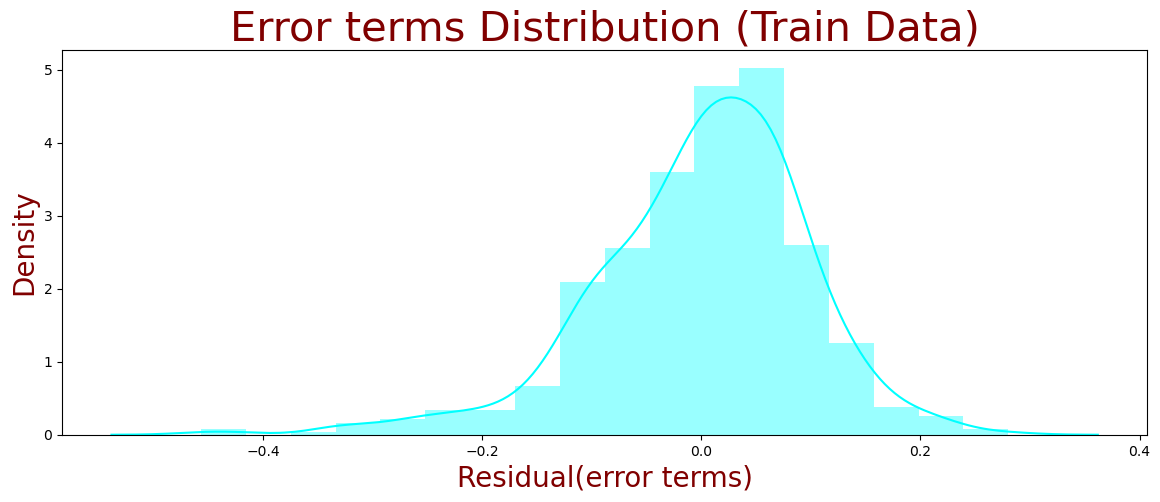

In [1240]:
#plotting hist plot to analyse residuals

residual = y-y_pred

fig= plt.figure()
plt.figure(figsize = (14,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (Train Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

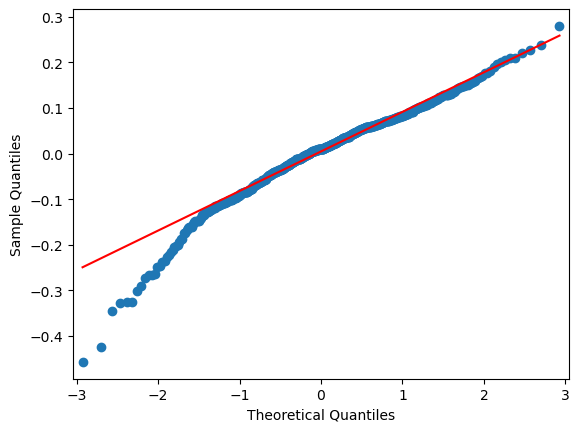

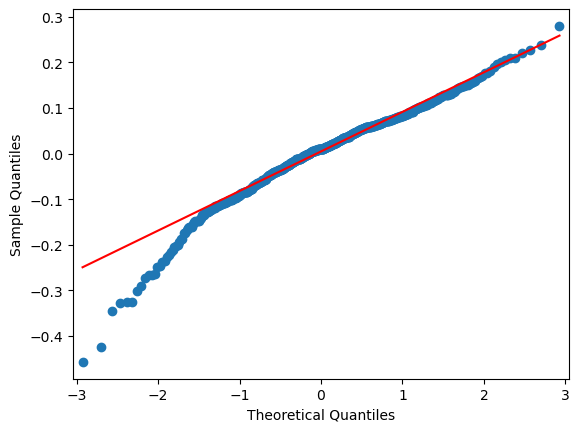

In [1242]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(residual, line='q')

### 7.3.2 A linear relationship exists between X and Y

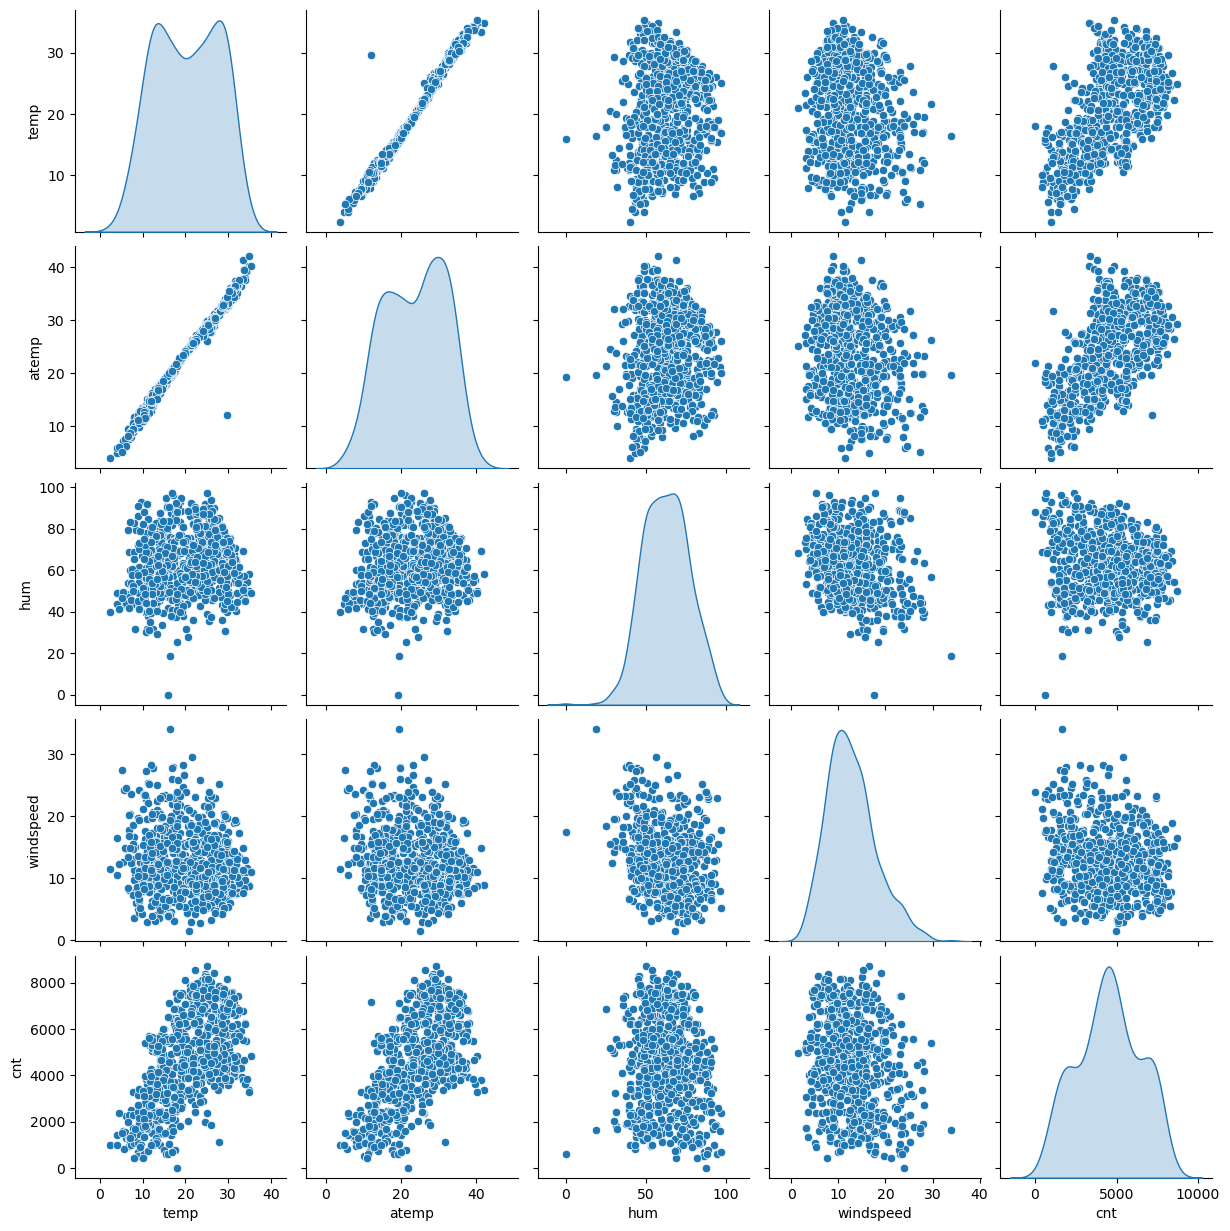

In [1244]:
new_bike= new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(new_bike, diag_kind='kde')
plt.show()

### 7.3.3 There is no multicollinearity between predictor variables

### 7.3.4 Homoscedasticity : Equal distribution of residuals across predictor variables

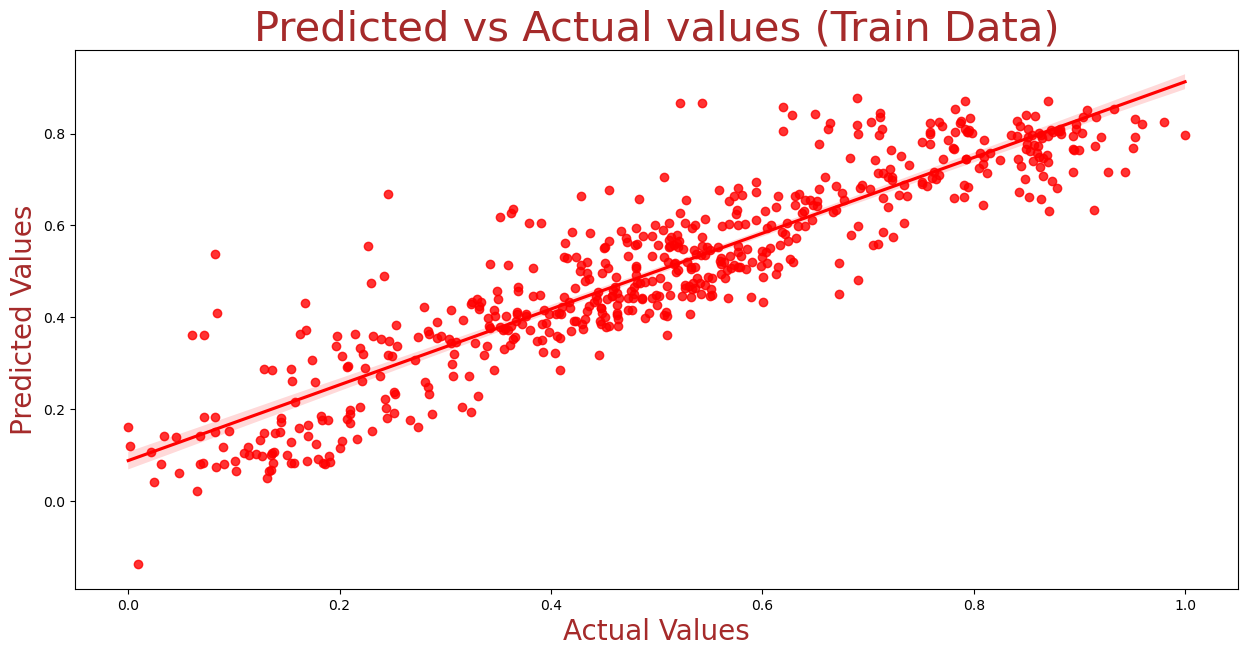

In [1246]:
plt.figure(figsize = (15,7))
sns.regplot(x=y, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Train Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

### Observation:

In [ ]:
# Clearly the residuals seem to be equally distribted across the predicted value.
# Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence 
# of high or low concentrated regions.

### 7.3.5 Error terms (residuals) are independent of predicted value.

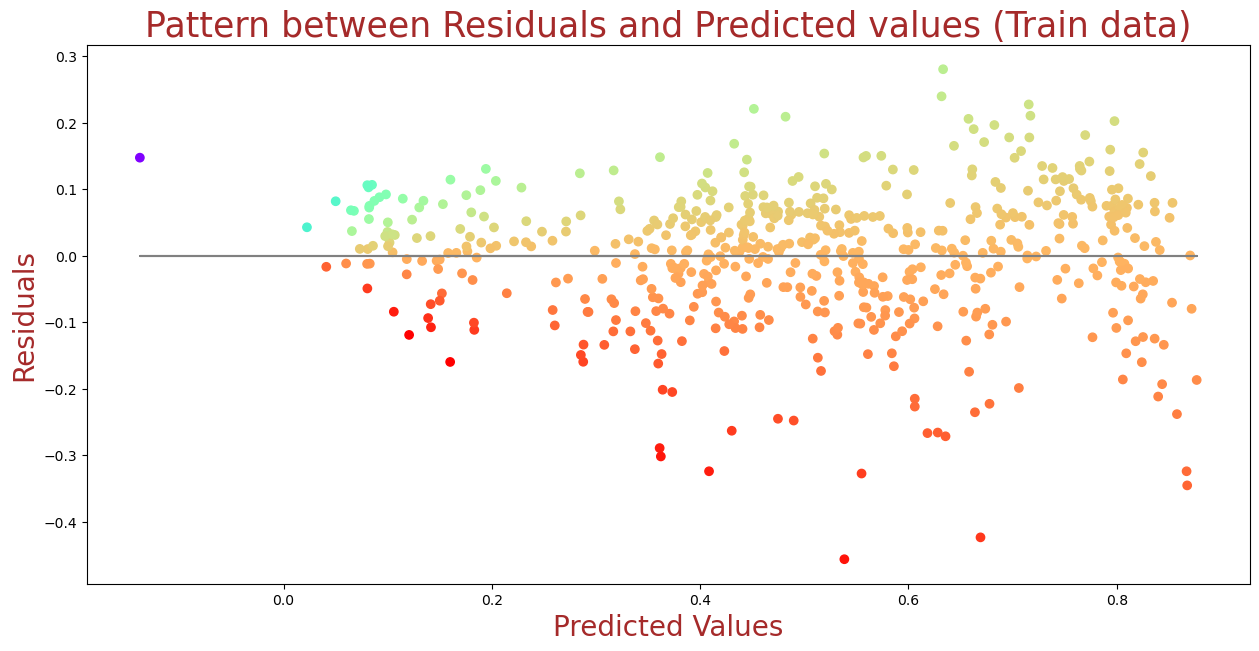

In [1248]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()

### Observations:

In [ ]:
# Clearly we don't see any pattern here as expected from our model. 
# There is no specific relation between the residuals and predicted values
# Also, for this dataset, the time series data might reflect autocorrelation as bike hire demand next year might depend on current year. 
# In such scenarios the regression model is likely to suffer due to autocorrelation.

# As we know the Durbin-Watson statistic is a test for autocorrelation in a dataset, we have Durbin-Watson statistic value : 1.860 
# It is slightly less than 2, this suggests there is a slight positive auto-correlation between some variables.

## 8. Predict on Test Data

In [561]:
# We will now anlyse and make predictions based on our test data as per the final model

### 8.1 Apply scaler to test data

In [1250]:
#Using scalar() on all numeric variables of test dataset, in order to make sure info leak between train and test

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num] = scale.transform(bike_test[bike_num])

In [1252]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
358,0,0,0,0.27,0.26,0.59,0.33,0.04,1,0,...,0,1,0,0,1,0,0,0,0,0
246,0,0,0,0.81,0.77,0.68,0.46,0.56,0,0,...,0,0,0,0,1,0,0,0,0,0
622,1,0,0,0.68,0.67,0.34,0.56,1.02,0,0,...,0,0,0,1,0,0,0,0,0,0
309,0,0,0,0.36,0.37,0.67,0.17,0.40,0,0,...,1,0,0,0,1,0,0,0,0,0
518,1,0,0,0.68,0.65,0.33,0.40,0.89,0,1,...,0,0,0,0,1,0,0,0,0,0


In [1254]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,...,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,0.55,0.03,0.65,0.53,0.50,0.50,0.43,0.50,0.26,0.25,...,0.07,0.12,0.12,0.12,0.20,0.11,0.13,0.17,0.05,0.36
std,0.50,0.18,0.48,0.23,0.22,0.22,0.21,0.26,0.44,0.44,...,0.25,0.32,0.33,0.32,0.40,0.31,0.34,0.38,0.21,0.48
min,0.00,0.00,0.00,0.05,0.03,-0.35,0.09,-0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,0.34,0.36,0.29,0.28,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.53,0.52,0.50,0.41,0.51,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.72,0.68,0.66,0.53,0.70,1.00,0.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,0.97,0.93,0.94,1.21,1.02,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


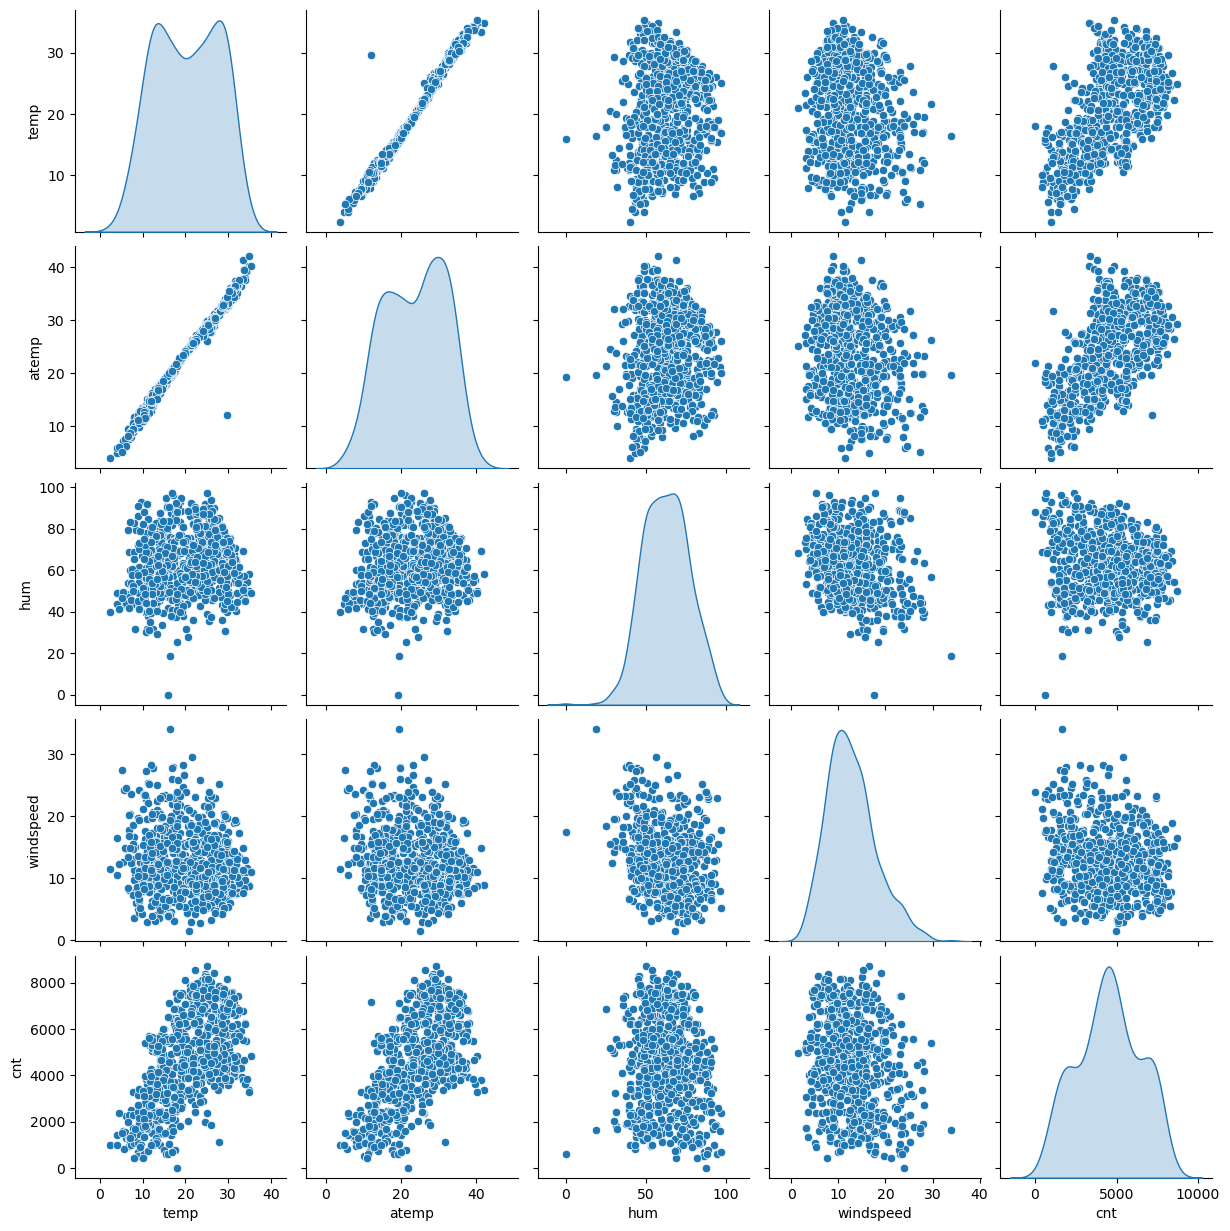

In [1256]:
# ANALYZE NUMERICAL COULUMNS FOR TEST DATASET

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num]
sns.pairplot(new_bike, diag_kind='kde')
plt.show()

### There is a similar pattern as that of train data and bith, temp and atemp show a postive linear correlation with target variable 'cnt'.

### 8.2 Divide x_test and y_test

In [1258]:
#setting up our target variable
y_test = bike_test.pop('cnt')

#setting up our test variables (features)
x_test= bike_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 358 to 472
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   season_spring                     146 non-null    uint8  
 8   season_summer                     146 non-null    uint8  
 9   season_winter                     146 non-null    uint8  
 10  mnth_2                            146 non-null    uint8  
 11  mnth_3                            146 non-null    uint8  
 12  mnth_4     

In [1260]:
## picking all variables which are part of our final model (filteringour required variables)

col_final = x_rfe.columns
x_test_new = x_test[col_final]
x_test_new

,yr,atemp,windspeed,season_spring,mnth_9,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
358,0,0.26,0.33,1,0,0,0
246,0,0.77,0.46,0,1,0,0
622,1,0.67,0.56,0,1,0,0
309,0,0.37,0.17,0,0,0,0
518,1,0.65,0.40,0,0,0,0
...,...,...,...,...,...,...,...
342,0,0.31,0.15,0,0,0,0
262,0,0.59,0.28,0,1,0,1
677,1,0.36,0.48,0,0,0,0
705,1,0.32,0.27,0,0,0,1


In [1262]:
## Add a constant variable to test dataset

x_test_new = sm.add_constant(x_test_new)
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 358 to 472
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             146 non-null    float64
 1   yr                                146 non-null    int64  
 2   atemp                             146 non-null    float64
 3   windspeed                         146 non-null    float64
 4   season_spring                     146 non-null    uint8  
 5   mnth_9                            146 non-null    uint8  
 6   weathersit_Light-Snow/Rain/Storm  146 non-null    uint8  
 7   weathersit_Mist/Cloudy            146 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 6.3 KB


In [1264]:
## make predictions based on final model

y_pred =  lr_m9.predict(x_test_new)

### 8.3 Linear Regression Assumptions Check for Test data

### 8.3.1 Residual analysis

<Figure size 640x480 with 0 Axes>

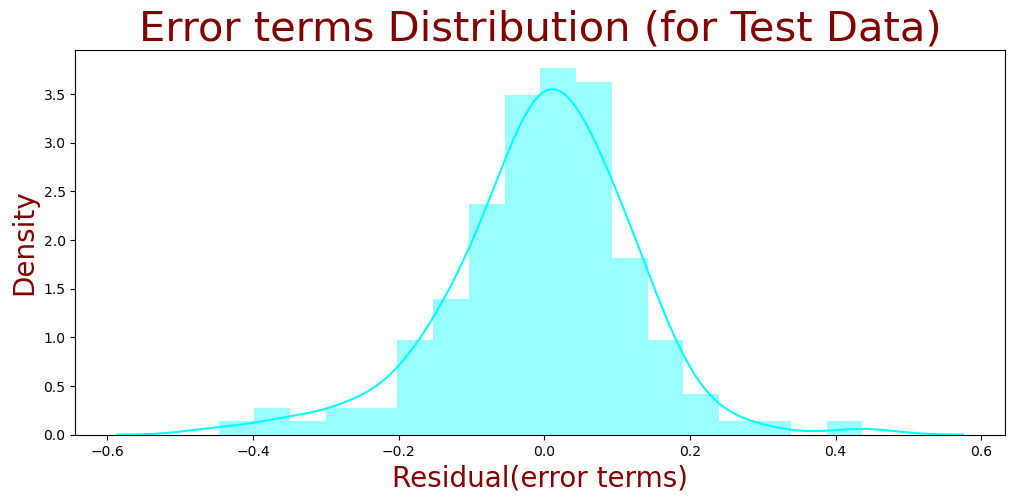

In [1266]:
#plotting hist plot to analyse residuals

residual = y_test-y_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

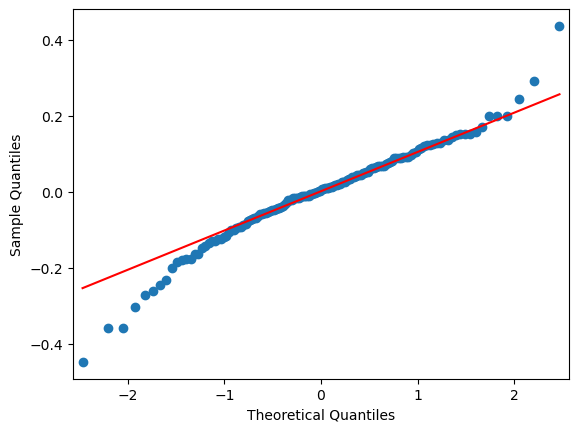

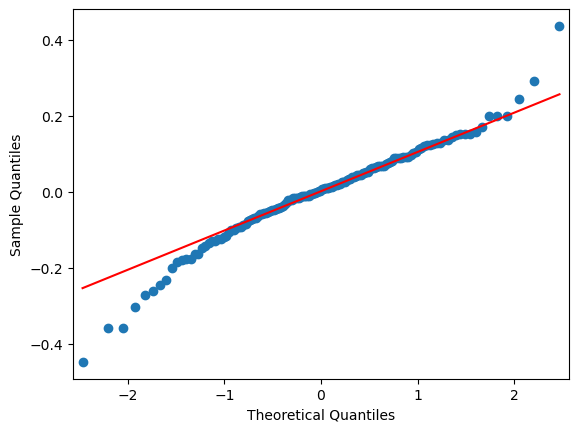

In [1268]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test-y_pred
sm.qqplot(residual, line='q')

### 8.3.2 Homoscedasticity check

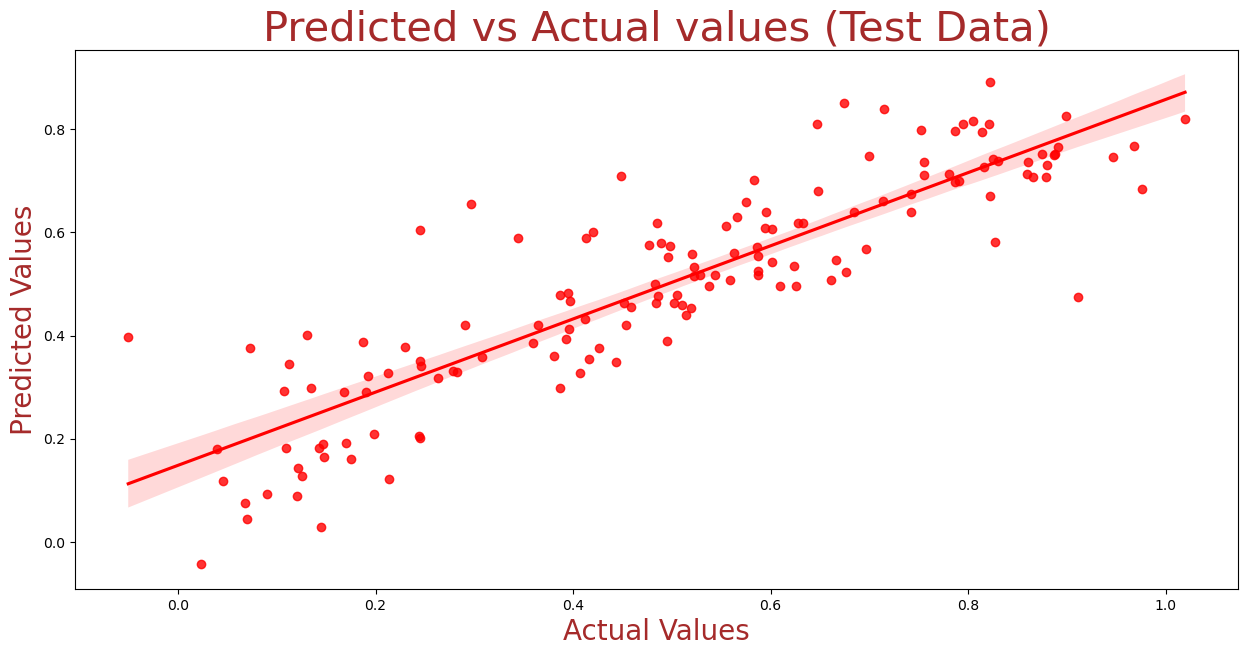

In [1270]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

### Pattern check (between residuals and predicted values)

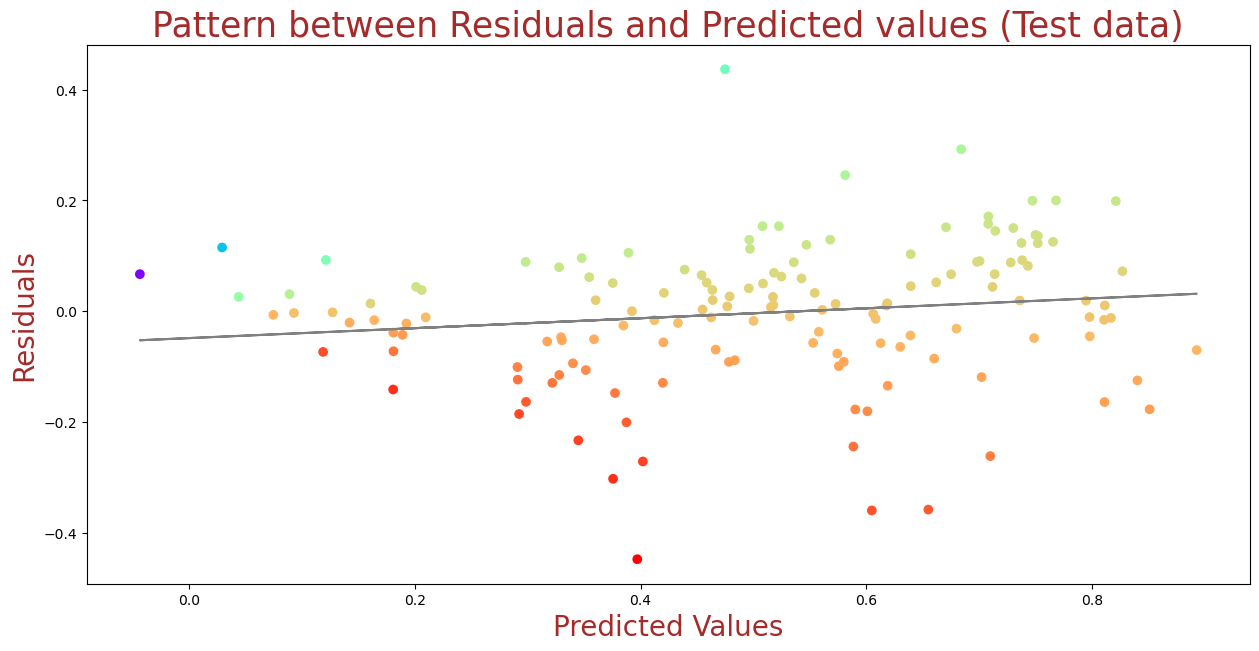

In [1273]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Test data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()

### Observation:

In [1276]:
# This clearly reflects as we don't see any pattern here as expected from our model. 
# There is no specific relation between the residuals and predicted values

## 9. Final Model Evaluation on Test Data

### 9.1 Final model accuracy analysis

<Figure size 640x480 with 0 Axes>

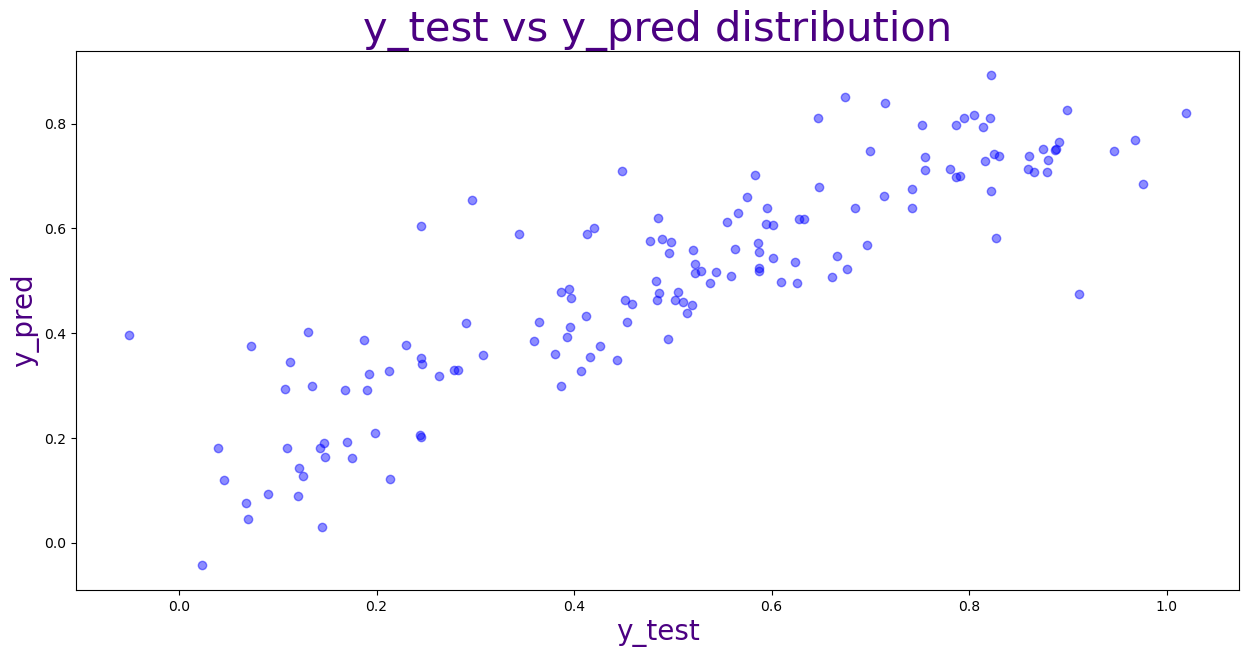

In [1280]:
## Plot y_test and y_pred to see the accuracy of our final model
import matplotlib.cm as cm

fig= plt.figure()
c=cm.rainbow
plt.figure(figsize = (15,7))
plt.scatter(y_test, y_pred, alpha= 0.45, color = "blue")
plt.title ('y_test vs y_pred distribution' , fontsize=30, color='indigo')
plt.xlabel("y_test", fontsize=20, color='indigo')
plt.ylabel("y_pred", fontsize=20,  color='indigo')
plt.show()

### Observation:

In [1283]:
# It's clear from the above plot that our model is accurate enough to predict the demand for bikes.
# The predicted and actual value points show a significant overlap throughout to indicate the change in demand as well

### 9.2 R-squared comparison for Test and Train

In [1286]:
#calculating R-squared value for test model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7676771085898801

### 9.3 Adjusted R-squared comparison

In [1289]:
# evaluate the adjusted R squared for test model

r2 = 0.8068032076231737
x_row = x_test.shape[0]

#number of predictors
pred = x_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.7585040095289671

## 10. Insights

In [ ]:
As per the final model (Model-9), the best fit equation is :
cnt = 0.2506 + ( 0.2543 * yr ) + ( 0.0257 * workingday ) + ( 0.3845 * atemp) - ( 0.0732 * windspeed ) - ( 0.1641 * season_spring)
 + ( 0.0887 * mnth_9 ) + ( 0.0790 * mnth_10 ) - ( 0.2670 * weathersit_Light/Snow/Rain/Storm ) - ( 0.0837 * weathersit_Mist/Cloudy )

Top 5 predictors for our target variable are :

Feeling Temperature (atemp) It has coefficient value 0.3688. 
Hence, a unit increase in atemp will increase the number of hired bikes by 0.3688 units
                
Year (yr) : It has coefficient value 0.2550. Hence, a unit increase in yr will increase the number of hired bikes by 0.2550 units
                
weathersit_Light-Snow/Rain/Storm : It has coefficient value -0.2540. 
Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by -0.2540 units
                
season_spring : It has coefficient value -0.1788. 
Hence, a unit increase in season_spring will decrease the number of hired bikes by -0.1788 units

September Month (mnth_9) It has coefficient value 0.0766. 
Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0766 units
                
It is thus important to keep a check on the above to achieve maximum booking for bikes. 

## 11. Conclusion

In [ ]:
1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
in regions that are higher in termperature and humidity

2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
not invest heavily in such regions as it will be an insignificant investment.

3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
and specially during months July-October.

4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer
discounts or other offers that may enhance the numbers during Spring.

5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
bikes per region.